<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/bolometric_estimations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import rc
from astropy import units as u
from astropy.io import fits

In [0]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':24})
rc('text', usetex=True)

In [3]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

! sudo apt-get install msttcorefonts -q
! sudo apt-get install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [0]:
#Parsec models
#Including everything
#Synthetic models

#Column order GAIA
#Zini MH logAge Mini int_IMF Mass logL logTe logg label       0-9
#McoreTP C_O period0 period1 pmode Mloss tau1m X Y Xc         10-19
#Xn Xo Cexcess Z mbolmag Gmag G_BPmag G_RPmag     20-27

#The IMF does not matter that much
file1 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10).txt'
file2 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.003).txt'
file3 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.004).txt'
file4 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.005).txt'
file5 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.006).txt'
file6 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.007).txt'
file7 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.008).txt'
file8 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.009).txt'
file9 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.01).txt'
file10 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.02).txt'
file11 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.03).txt'
file12 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.04).txt'
file13 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.05).txt'
file14 = 'https://raw.githubusercontent.com/suafle/useful_data/master/PARSEC/GAIA(1e10)_Z(0.06).txt'

data1 = np.loadtxt(file1)
data2 = np.loadtxt(file2)
data3 = np.loadtxt(file3)
data4 = np.loadtxt(file4)
data5 = np.loadtxt(file5)
data6 = np.loadtxt(file6)
data7 = np.loadtxt(file7)
data8 = np.loadtxt(file8)
data9 = np.loadtxt(file9)
data10 = np.loadtxt(file10)
data11 = np.loadtxt(file11)
data12 = np.loadtxt(file12)
data13 = np.loadtxt(file13)
data14 = np.loadtxt(file14)

G1 = data1[:,25][:-1]
BP1 = data1[:,26][:-1]
RP1 = data1[:,27][:-1]
L1 = data1[:,6][:-1]
T1 = data1[:,7][:-1]
label1 = data1[:,9][:-1]

G2 = data2[:,25][:-1]
BP2 = data2[:,26][:-1]
RP2 = data2[:,27][:-1]
L2 = data2[:,6][:-1]
T2 = data2[:,7][:-1]
label2 = data2[:,9][:-1]

G3 = data3[:,25][:-1]
BP3 = data3[:,26][:-1]
RP3 = data3[:,27][:-1]
L3 = data3[:,6][:-1]
T3 = data3[:,7][:-1]
label3 = data3[:,9][:-1]

G4 = data4[:,25][:-1]
BP4 = data4[:,26][:-1]
RP4 = data4[:,27][:-1]
L4 = data4[:,6][:-1]
T4 = data4[:,7][:-1]
label4 = data4[:,9][:-1]

G5 = data5[:,25][:-1]
BP5 = data5[:,26][:-1]
RP5 = data5[:,27][:-1]
L5 = data5[:,6][:-1]
T5 = data5[:,7][:-1]
label5 = data5[:,9][:-1]

G6 = data6[:,25][:-1]
BP6 = data6[:,26][:-1]
RP6 = data6[:,27][:-1]
L6 = data6[:,6][:-1]
T6 = data6[:,7][:-1]
label6 = data6[:,9][:-1]

G7 = data7[:,25][:-1]
BP7 = data7[:,26][:-1]
RP7 = data7[:,27][:-1]
L7 = data7[:,6][:-1]
T7 = data7[:,7][:-1]
label7 = data7[:,9][:-1]

G8 = data8[:,25][:-1]
BP8 = data8[:,26][:-1]
RP8 = data8[:,27][:-1]
L8 = data8[:,6][:-1]
T8 = data8[:,7][:-1]
label8 = data8[:,9][:-1]

G9 = data9[:,25][:-1]
BP9 = data9[:,26][:-1]
RP9 = data9[:,27][:-1]
L9 = data9[:,6][:-1]
T9 = data9[:,7][:-1]
label9 = data9[:,9][:-1]

G10 = data10[:,25][:-1]
BP10 = data10[:,26][:-1]
RP10 = data10[:,27][:-1]
L10 = data10[:,6][:-1]
T10 = data10[:,7][:-1]
label10 = data10[:,9][:-1]

G11 = data11[:,25][:-1]
BP11 = data11[:,26][:-1]
RP11 = data11[:,27][:-1]
L11 = data11[:,6][:-1]
T11 = data11[:,7][:-1]
label11 = data11[:,9][:-1]

G12 = data12[:,25][:-1]
BP12 = data12[:,26][:-1]
RP12 = data12[:,27][:-1]
L12 = data12[:,6][:-1]
T12 = data12[:,7][:-1]
label12 = data12[:,9][:-1]

G13 = data13[:,25][:-1]
BP13 = data13[:,26][:-1]
RP13 = data13[:,27][:-1]
L13 = data13[:,6][:-1]
T13 = data13[:,7][:-1]
label13 = data13[:,9][:-1]

G14 = data14[:,25][:-1]
BP14 = data14[:,26][:-1]
RP14 = data14[:,27][:-1]
L14 = data14[:,6][:-1]
T14 = data14[:,7][:-1]
label14 = data14[:,9][:-1]



label1 = np.where(label1==3, 2, label1)
label1 = np.where(label1==4, 3, label1) 
label1 = np.where(label1==5, 3, label1) 
label1 = np.where(label1==6, 3, label1) 
label1 = np.where(label1==7, 4, label1) 
label1 = np.where(label1==8, 4, label1) 
label1 = np.where(label1==9, 5, label1) 

label2 = np.where(label2==3, 2, label2)
label2 = np.where(label2==4, 3, label2) 
label2 = np.where(label2==5, 3, label2) 
label2 = np.where(label2==6, 3, label2) 
label2 = np.where(label2==7, 4, label2) 
label2 = np.where(label2==8, 4, label2) 
label2 = np.where(label2==9, 5, label2) 

label3 = np.where(label3==3, 2, label3)
label3 = np.where(label3==4, 3, label3) 
label3 = np.where(label3==5, 3, label3) 
label3 = np.where(label3==6, 3, label3) 
label3 = np.where(label3==7, 4, label3) 
label3 = np.where(label3==8, 4, label3) 
label3 = np.where(label3==9, 5, label3) 

label4 = np.where(label4==3, 2, label4)
label4 = np.where(label4==4, 3, label4) 
label4 = np.where(label4==5, 3, label4) 
label4 = np.where(label4==6, 3, label4) 
label4 = np.where(label4==7, 4, label4) 
label4 = np.where(label4==8, 4, label4) 
label4 = np.where(label4==9, 5, label4) 

label5 = np.where(label5==3, 2, label5)
label5 = np.where(label5==4, 3, label5) 
label5 = np.where(label5==5, 3, label5) 
label5 = np.where(label5==6, 3, label5) 
label5 = np.where(label5==7, 4, label5) 
label5 = np.where(label5==8, 4, label5) 
label5 = np.where(label5==9, 5, label5) 

label6 = np.where(label6==3, 2, label6)
label6 = np.where(label6==4, 3, label6) 
label6 = np.where(label6==5, 3, label6) 
label6 = np.where(label6==6, 3, label6) 
label6 = np.where(label6==7, 4, label6) 
label6 = np.where(label6==8, 4, label6) 
label6 = np.where(label6==9, 5, label6)

label7 = np.where(label7==3, 2, label7)
label7 = np.where(label7==4, 3, label7) 
label7 = np.where(label7==5, 3, label7) 
label7 = np.where(label7==6, 3, label7) 
label7 = np.where(label7==7, 4, label7) 
label7 = np.where(label7==8, 4, label7) 
label7 = np.where(label7==9, 5, label7)

label8 = np.where(label8==3, 2, label8)
label8 = np.where(label8==4, 3, label8) 
label8 = np.where(label8==5, 3, label8) 
label8 = np.where(label8==6, 3, label8) 
label8 = np.where(label8==7, 4, label8) 
label8 = np.where(label8==8, 4, label8) 
label8 = np.where(label8==9, 5, label8)

label9 = np.where(label9==3, 2, label9)
label9 = np.where(label9==4, 3, label9) 
label9 = np.where(label9==5, 3, label9) 
label9 = np.where(label9==6, 3, label9) 
label9 = np.where(label9==7, 4, label9) 
label9 = np.where(label9==8, 4, label9) 
label9 = np.where(label9==9, 5, label9)

label10 = np.where(label10==3, 2, label10)
label10 = np.where(label10==4, 3, label10) 
label10 = np.where(label10==5, 3, label10) 
label10 = np.where(label10==6, 3, label10) 
label10 = np.where(label10==7, 4, label10) 
label10 = np.where(label10==8, 4, label10) 
label10 = np.where(label10==9, 5, label10)

label11 = np.where(label11==3, 2, label11)
label11 = np.where(label11==4, 3, label11) 
label11 = np.where(label11==5, 3, label11) 
label11 = np.where(label11==6, 3, label11) 
label11 = np.where(label11==7, 4, label11) 
label11 = np.where(label11==8, 4, label11) 
label11 = np.where(label11==9, 5, label11)

label12 = np.where(label12==3, 2, label12)
label12 = np.where(label12==4, 3, label12) 
label12 = np.where(label12==5, 3, label12) 
label12 = np.where(label12==6, 3, label12) 
label12 = np.where(label12==7, 4, label12) 
label12 = np.where(label12==8, 4, label12) 
label12 = np.where(label12==9, 5, label12)

label13 = np.where(label13==3, 2, label13)
label13 = np.where(label13==4, 3, label13) 
label13 = np.where(label13==5, 3, label13) 
label13 = np.where(label13==6, 3, label13) 
label13 = np.where(label13==7, 4, label13) 
label13 = np.where(label13==8, 4, label13) 
label13 = np.where(label13==9, 5, label13)

label14 = np.where(label14==3, 2, label14)
label14 = np.where(label14==4, 3, label14) 
label14 = np.where(label14==5, 3, label14) 
label14 = np.where(label14==6, 3, label14) 
label14 = np.where(label14==7, 4, label14) 
label14 = np.where(label14==8, 4, label14) 
label14 = np.where(label14==9, 5, label14)

In [0]:
#Just MS stars
ms1 = np.where(label1==1.)
ms2 = np.where(label2==1.)
ms3 = np.where(label3==1.)
ms4 = np.where(label4==1.)
ms5 = np.where(label5==1.)
ms6 = np.where(label6==1.)
ms7 = np.where(label7==1.)
ms8 = np.where(label8==1.)
ms9 = np.where(label9==1.)
ms10 = np.where(label10==1.)
ms11 = np.where(label11==1.)
ms12 = np.where(label12==1.)
ms13 = np.where(label13==1.)
ms14 = np.where(label14==1.)

gms1 = G1[ms1]
bp_ms1 = BP1[ms1]
rp_ms1 = RP1[ms1]
lms1 = L1[ms1]
tms1 = T1[ms1]

gms2 = G2[ms2]
bp_ms2 = BP2[ms2]
rp_ms2 = RP2[ms2]
lms2 = L2[ms2]
tms2 = T2[ms2]

gms3 = G3[ms3]
bp_ms3 = BP3[ms3]
rp_ms3 = RP3[ms3]
lms3 = L3[ms3]
tms3 = T3[ms3]

gms4 = G4[ms4]
bp_ms4 = BP4[ms4]
rp_ms4 = RP4[ms4]
lms4 = L4[ms4]
tms4 = T4[ms4]

gms5 = G5[ms5]
bp_ms5 = BP5[ms5]
rp_ms5 = RP5[ms5]
lms5 = L5[ms5]
tms5 = T5[ms5]

gms6 = G6[ms6]
bp_ms6 = BP6[ms6]
rp_ms6 = RP6[ms6]
lms6 = L6[ms6]
tms6 = T6[ms6]

gms7 = G7[ms7]
bp_ms7 = BP7[ms7]
rp_ms7 = RP7[ms7]
lms7 = L7[ms7]
tms7 = T1[ms7]

gms8 = G8[ms8]
bp_ms8 = BP8[ms8]
rp_ms8 = RP8[ms8]
lms8 = L8[ms8]
tms8 = T8[ms8]

gms9 = G9[ms9]
bp_ms9 = BP9[ms9]
rp_ms9 = RP9[ms9]
lms9 = L9[ms9]
tms9 = T9[ms9]

gms10 = G10[ms10]
bp_ms10 = BP10[ms10]
rp_ms10 = RP10[ms10]
lms10 = L10[ms10]
tms10 = T10[ms10]

gms11 = G11[ms11]
bp_ms11 = BP11[ms11]
rp_ms11 = RP11[ms11]
lms11 = L11[ms11]
tms11 = T11[ms11]

gms12 = G12[ms12]
bp_ms12 = BP12[ms12]
rp_ms12 = RP12[ms12]
lms12 = L12[ms12]
tms12 = T12[ms12]

gms13 = G13[ms13]
bp_ms13 = BP13[ms13]
rp_ms13 = RP13[ms13]
lms13 = L13[ms13]
tms13 = T13[ms13]

gms14 = G14[ms14]
bp_ms14 = BP14[ms14]
rp_ms14 = RP14[ms14]
lms14 = L14[ms14]
tms14 = T14[ms14]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


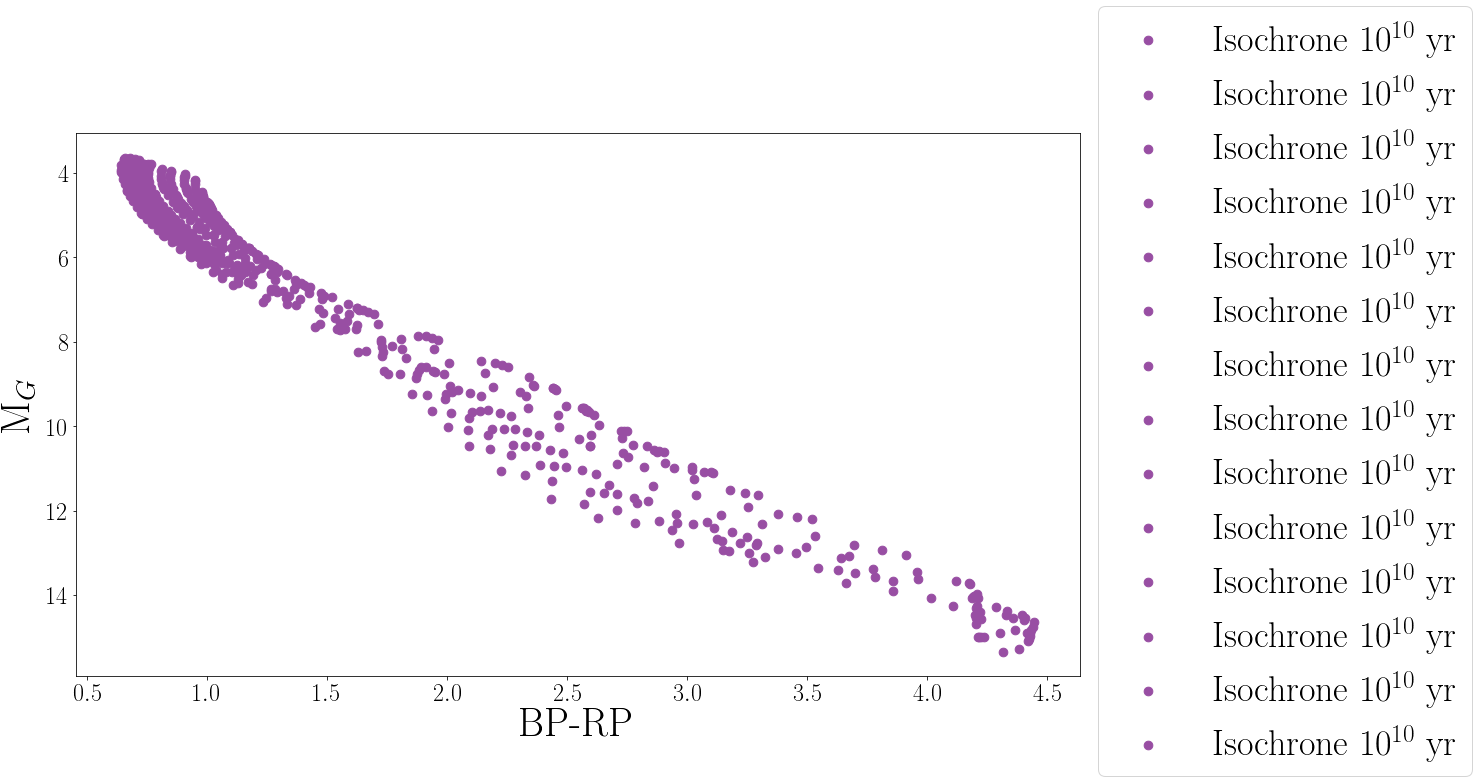

In [6]:
fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})

ax.scatter(bp_ms1-rp_ms1,gms1,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms2-rp_ms2,gms2,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms3-rp_ms3,gms3,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms4-rp_ms4,gms4,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms5-rp_ms5,gms5,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms6-rp_ms6,gms6,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms7-rp_ms7,gms7,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms8-rp_ms8,gms8,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms9-rp_ms9,gms9,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms10-rp_ms10,gms10,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms11-rp_ms11,gms11,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms12-rp_ms12,gms12,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms13-rp_ms13,gms13,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms14-rp_ms14,gms14,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

ax.invert_yaxis()
ax.set_xlabel('BP-RP',size=40)
ax.set_ylabel('M$_{G}$',size=40)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()

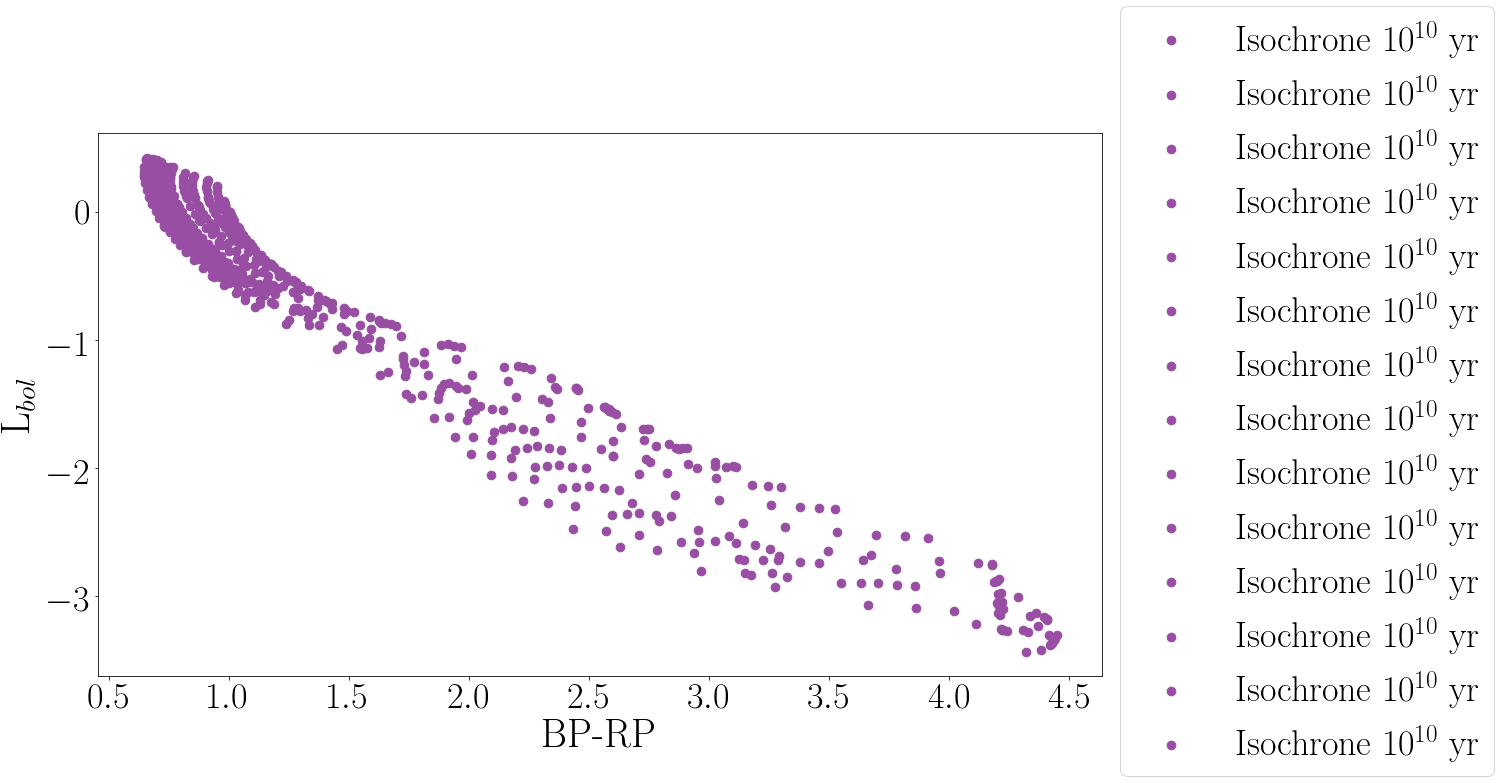

In [7]:
fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})

ax.scatter(bp_ms1-rp_ms1,lms1,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms2-rp_ms2,lms2,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms3-rp_ms3,lms3,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms4-rp_ms4,lms4,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms5-rp_ms5,lms5,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms6-rp_ms6,lms6,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms7-rp_ms7,lms7,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms8-rp_ms8,lms8,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms9-rp_ms9,lms9,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms10-rp_ms10,lms10,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms11-rp_ms11,lms11,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms12-rp_ms12,lms12,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms13-rp_ms13,lms13,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(bp_ms14-rp_ms14,lms14,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

#ax.invert_yaxis()
ax.set_xlabel('BP-RP',size=40)
ax.set_ylabel(r'L$_{bol}$',size=40)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()

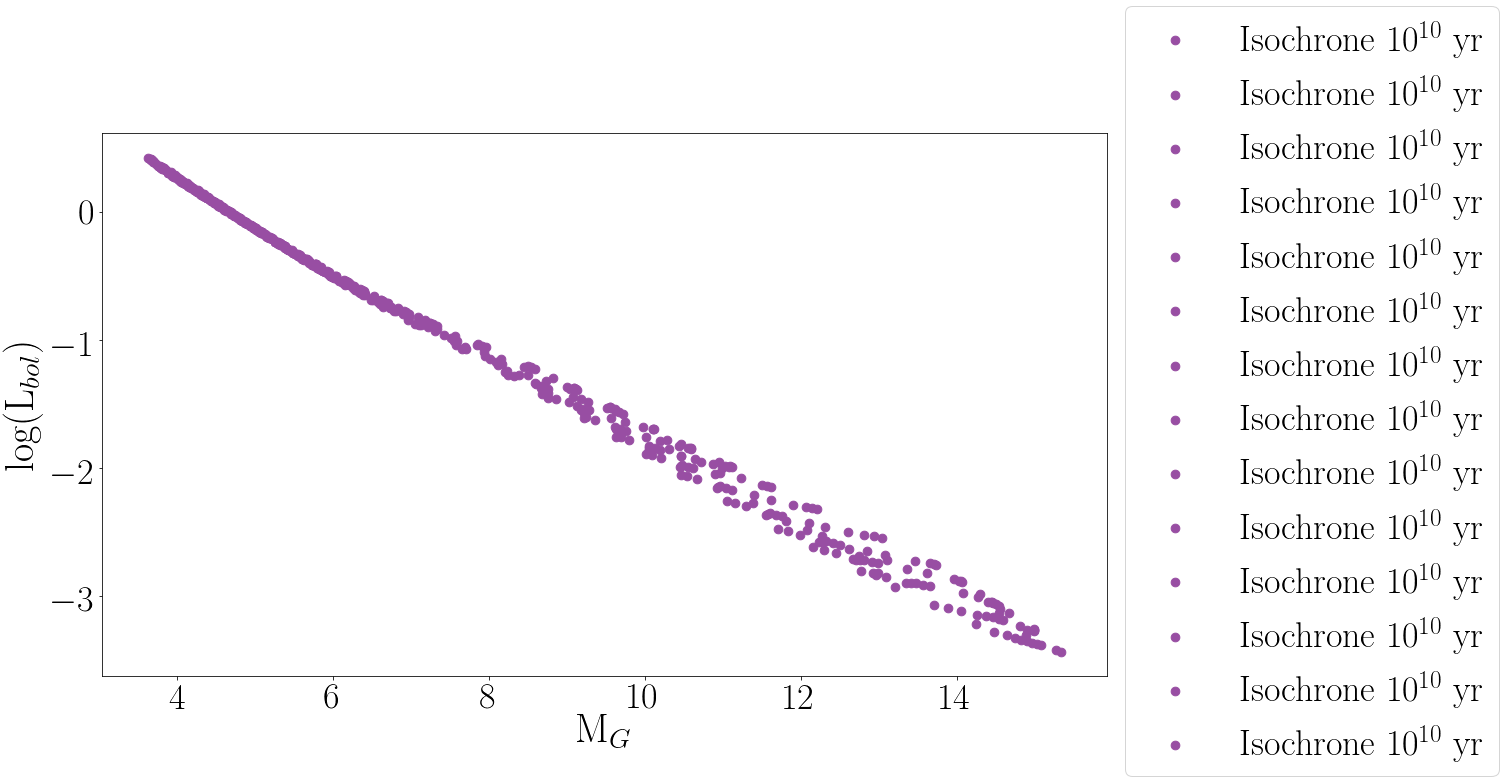

In [8]:
fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})

ax.scatter(gms1,lms1,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms2,lms2,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms3,lms3,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms4,lms4,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms5,lms5,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms6,lms6,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms7,lms7,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms8,lms8,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms9,lms9,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms10,lms10,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms11,lms11,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms12,lms12,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms13,lms13,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms14,lms14,label=r'Isochrone 10$^{10}$ yr',c='#984ea3',s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

#ax.invert_yaxis()
ax.set_xlabel(r'M$_G$',size=40)
ax.set_ylabel(r'log(L$_{bol}$)',size=40)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()

In [0]:
G = np.concatenate([gms1,gms2,gms3,gms4,gms5,gms6,gms7,gms8,gms9,gms10,gms11,gms12,gms13,gms14])
L = np.concatenate([lms1,lms2,lms3,lms4,lms5,lms6,lms7,lms8,lms9,lms10,lms11,lms12,lms13,lms14])

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(G,L)

x = np.linspace(2.5,16,3)
y = slope*x + intercept

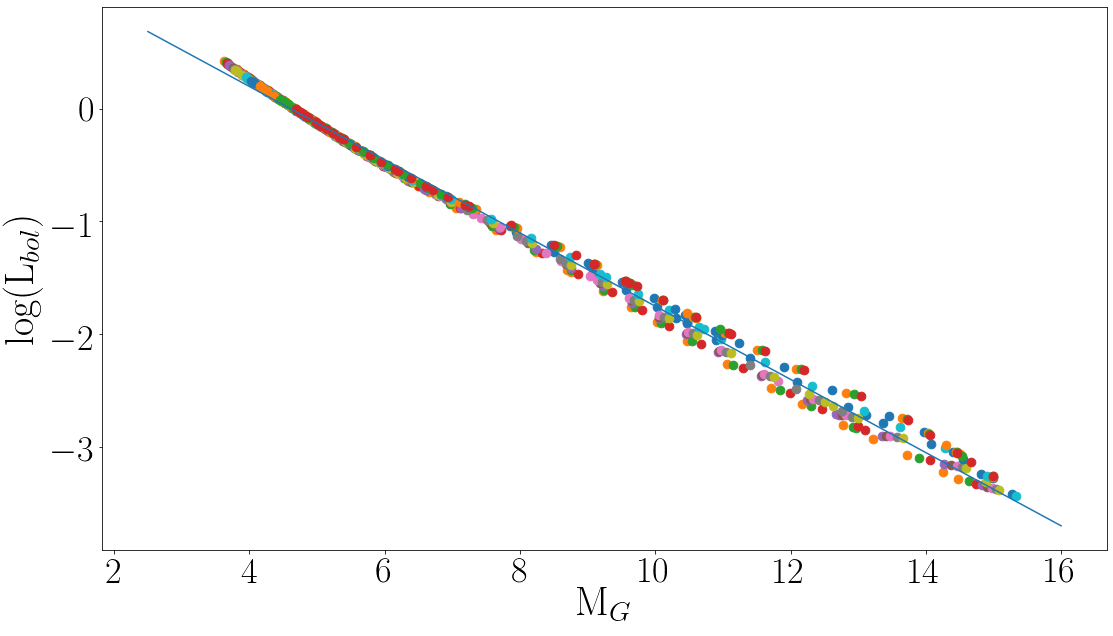

In [62]:
fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})

ax.plot(x,y)
ax.scatter(gms1,lms1,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms2,lms2,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms3,lms3,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms4,lms4,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms5,lms5,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms6,lms6,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms7,lms7,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms8,lms8,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms9,lms9,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms10,lms10,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms11,lms11,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms12,lms12,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms13,lms13,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(gms14,lms14,s=75)#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

#ax.invert_yaxis()
ax.set_xlabel(r'M$_G$',size=40)
ax.set_ylabel(r'log(L$_{bol}$)',size=40)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()

In [63]:
[a,b,c] = np.polyfit(G,L,2)
print(a,b,c)

0.0036819291120116842 -0.39007164024649293 1.7376612210648257


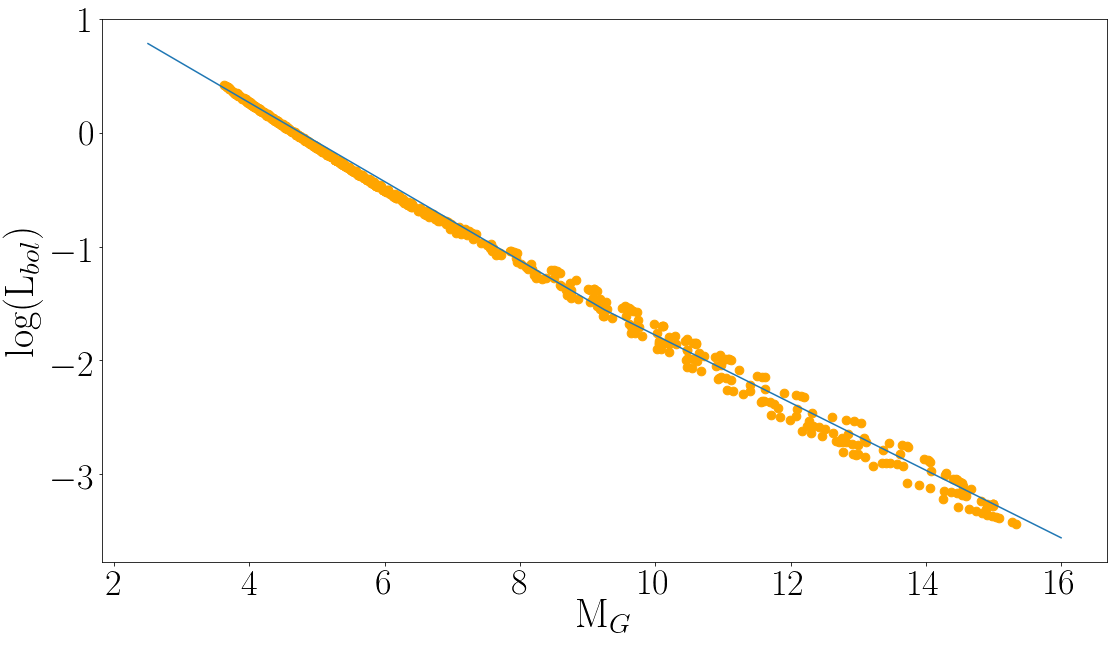

In [66]:
fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})


#ax.plot( x , a*x + b )
ax.plot( x , a*x**2 + b*x + c )
#ax.plot( x , 10**(a*x**2 + b*x + c ))
#ax.plot( x , a*x**3 + b*x**2 + c*x + d )
#ax.plot( x , a*x**4 + b*x**3 + c*x**2 + d*x + e )

#ax.scatter(G,10**(L),s=75,c='orange')#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()
ax.scatter(G,L,s=75,c='orange')#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

#ax.invert_yaxis()
ax.set_xlabel(r'M$_G$',size=40)
ax.set_ylabel(r'log(L$_{bol}$)',size=40)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()

#**Just fitting a small region**

In [71]:
loc = np.where(G>9)
loc

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 280, 281, 282, 283, 284,
        285, 286, 287, 288, 289, 290, 291, 292, 329, 330, 331, 332, 333,
        334, 335, 336, 337, 338, 339, 340, 341, 342, 382, 383, 384, 385,
        386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 431, 432, 433,
        434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 477, 478,
        479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
        492, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
        537, 538, 539, 540, 541, 572, 573, 574, 575, 576, 577, 578, 579,
        580, 581, 582, 583, 584, 585, 586, 587, 588

In [0]:
Gf = G[loc]
Lf = L[loc]

In [75]:
[a,b] = np.polyfit(Gf,Lf,1)
print(a,b)

-0.3120815601132634 1.353163243354596


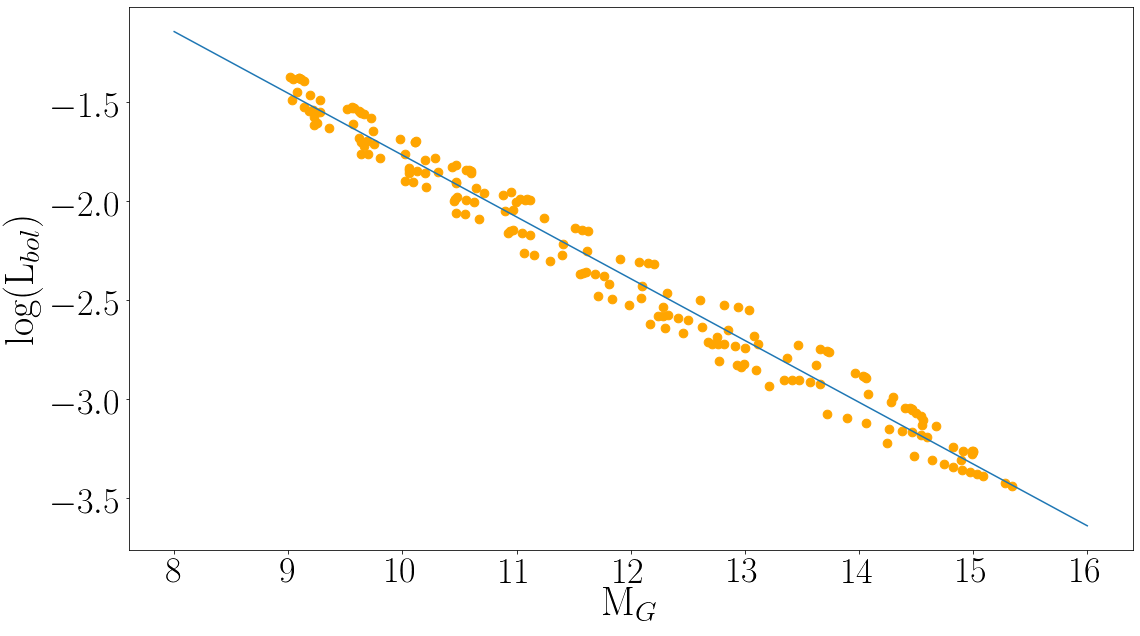

In [77]:
x = np.linspace(8,16,3)

fig, ax = plt.subplots(figsize=(18,10))
matplotlib.rcParams.update({'font.size': 36})

ax.plot( x , a*x + b )
#ax.plot( x , a*x**2 + b*x + c )
#ax.plot( x , a*x**3 + b*x**2 + c*x + d )
#ax.plot( x , a*x**4 + b*x**3 + c*x**2 + d*x + e )

ax.scatter(Gf,Lf,s=75,c='orange')#,cmap='magma')#,alpha=0.5,vmax=28000,vmin=2500)ax.invert_yaxis()

ax.set_xlabel(r'M$_G$',size=40)
ax.set_ylabel(r'log(L$_{bol}$)',size=40)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.525))
#plt.savefig("stuff.pdf", bbox_inches='tight')
#files.download("stuff.pdf")
plt.show()
plt.close()